# Activity #2 (5 marks)


Class Activity: Analyzing NYC Hyperlocal Air Quality Data with Spatial Join

# Objective:
- This activity reinforces concepts from Chapters 6 (Tables), 7 (Visualization), 8 (Functions and Tables), and 9 (Randomness). Students will analyze NYC hyperlocal air quality data using Python in a Jupyter Notebook (Google Colab). The focus will be on leveraging the Table abstraction wherever possible. Additionally, students will use spatial join techniques to combine air quality sensor readings with geographic data.

given a csv file containing longitude, latitude , and pm10  columns [Air Quality data](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv) representing readings of low cost air quality sensor mounted on moving vehicles, in addition to a geojson file containing polygons representing administrative divisions of NYC city known as neighbourhoods [nyc_polygon.geojson](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson).
# Dataset Description
- Air Quality Sensor Readings (NYC_PM.csv) :
Attributes: SensorID, time, temperature, humidity, pm25,
Focus attributes: temperature, humidity, pm1,pm25,pm10,
- City Polygons (nyc_polygon.geojson) :
Contains polygons representing neighborhoods or boroughs in NYC.
Used for spatially joining geographic information with air quality data.

## **part - A** preprocessing [0 marks]

do all tasks and the subtasks!

# Onboarding Code Provided
- The following code will be provided in an onboarding Jupyter Notebook to help students get started:



In [1]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

import necessary libraries

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from datascience import *
%matplotlib inline
#path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

###1. Read the CSV file containing PM sensor readings
 & Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame

In [4]:

# Step 1: Read the CSV file containing PM10 sensor readings
pm10_data = pd.read_csv('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv',index_col=False)

# Step 2: Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame
nyc_neighborhoods = gpd.read_file('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson')


In [6]:
pm10_data.dtypes

,0
SensorID,object
time,int64
latitude,float64
longitude,float64
bin0,int64
bin1,int64
bin2,int64
bin3,int64
bin4,int64
bin5,int64


### 2. convert the csv into a geodataframe and join it (sjoin) with the geojson, assign a coordinate reference system (CRS) the csv geodataframe which is identical to that of the geojson file, then perform the join, the result is a geodataframe, convert it to dataframe, and select pm10, neighborhood columns in a new dataframe

In [7]:
pm10_gdf = gpd.GeoDataFrame(pm10_data, geometry=gpd.points_from_xy(pm10_data.longitude, pm10_data.latitude))
merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')

<ipython-input-7-d43866676e2a>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')


In [9]:
merged_data.dtypes

,0
SensorID,object
time,int64
latitude,float64
longitude,float64
bin0,int64
bin1,int64
bin2,int64
bin3,int64
bin4,int64
bin5,int64


In [10]:
pollution_data = merged_data[['pm10','neighborhood']]

In [11]:
pollution_data.shape[0]

118495

In [13]:
merged_data.rename(columns={'neighborhood': 'neighborhood1'}, inplace=True)

In [14]:
type(pollution_data)

pandas.core.frame.DataFrame

3. you need to convert</h1></section> from dataframe to Datascience Table. Use the following format: ```Table.from_df(df, keep_index=False)``` read more here
[create DS Table from DF](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.from_df.html)

**N.B.** <font color='red'>NOW, perform all tasks using the table abstraction as we have learned in the class!</font>

the following is the opposite:

[Table.to_df](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.to_df.html)

what is the maximum pm10 value

In [15]:
pollution_data['pm10'].max()

87341.71

what is the maximum pm10 value

In [16]:
pollution_data['pm10'].min()

0.0

In [17]:
joined_table = Table().from_df(pollution_data)

show the first few rows of the table?

In [18]:
joined_table.show(2)

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park


print minimum and maximum pm10 values?

In [19]:
pm10 = joined_table.column('pm10')
min(pm10), max(pm10)

(0.0, 87341.710000000006)

#Instructions for Students
-You task is to analyze NYC hyperlocal air quality data using the provided dataset. Complete the following tasks in your Jupyter Notebook. Each task is worth 1 mark , for a total of 5 marks . Use the Table abstraction wherever possible.

# Tasks

###Task 1: Explore the Joined Data Using Tables (1 Mark)
- Display the first 5 rows of the joined_table using .show().
- Print the number of rows and columns in the table.
- Identify any missing values in the table and handle them appropriately (e.g., drop rows with missing values or fill them with a default value).

In [22]:
# Display the first 5 rows of the joined_table
joined_table.show(5)
print("\n" + "-" * 50 + "\n")  # Break line

# Print the number of rows and columns
print("Number of rows:", joined_table.num_rows)
print("Number of columns:", joined_table.num_columns)
print("\n" + "-" * 50 + "\n")  # Break line

# Identify missing values
missing_values = joined_table.to_df().isnull().sum()
print("Missing values per column:\n", missing_values)
print("\n" + "-" * 50 + "\n")  # Break line


pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park
0.76,Bronx Park
47.36,Bronx Park
6.18,Bronx Park



--------------------------------------------------

Number of rows: 118495
Number of columns: 2

--------------------------------------------------

Missing values per column:
 pm10            0
neighborhood    0
dtype: int64

--------------------------------------------------



# Task 2: Create Summary Statistics Using Table Operations (1 Mark)

- Compute summary statistics (mean, median, min, max) for the attributes temperature, humidity, and pm25 using table operations like .column() and .apply().
- Group the data by borough and calculate the average pm25 levels for each borough using .group() or .pivot().
- Display the results in a new table.

In [23]:
# Add necessary columns from the original dataset
pm10_data_selected = pm10_data[['pm10', 'pm25', 'temperature', 'humidity', 'longitude', 'latitude']]
pm10_gdf = gpd.GeoDataFrame(pm10_data_selected, geometry=gpd.points_from_xy(pm10_data_selected.longitude, pm10_data_selected.latitude))
merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')

# Create a new table with required columns
pollution_table = Table().from_df(merged_data[['pm10', 'pm25', 'temperature', 'humidity', 'neighborhood']])


<ipython-input-23-1c70537d6ee2>:4: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')


In [24]:
summary_stats = Table().with_columns(
    "Statistic", ["Mean", "Median", "Min", "Max"],
    "Temperature", [
        np.mean(pollution_table.column('temperature')),
        np.median(pollution_table.column('temperature')),
        np.min(pollution_table.column('temperature')),
        np.max(pollution_table.column('temperature'))
    ],
    "Humidity", [
        np.mean(pollution_table.column('humidity')),
        np.median(pollution_table.column('humidity')),
        np.min(pollution_table.column('humidity')),
        np.max(pollution_table.column('humidity'))
    ],
    "PM2.5", [
        np.mean(pollution_table.column('pm25')),
        np.median(pollution_table.column('pm25')),
        np.min(pollution_table.column('pm25')),
        np.max(pollution_table.column('pm25'))
    ]
)

summary_stats.show()


Statistic,Temperature,Humidity,PM2.5
Mean,8.24158,50.1549,7.37452
Median,7.2,46.2,3.02
Min,-7.9,0,0
Max,10471,104.2,3267.02


In [25]:
#Grouping data by each borough and calculating the average pm25
borough_avg_pm25 = pollution_table.group("neighborhood", np.mean).select("neighborhood", "pm25 mean")

# Rename for clarity
borough_avg_pm25 = borough_avg_pm25.relabel("pm25 mean", "Average PM2.5")

borough_avg_pm25.show()


neighborhood,Average PM2.5
Allerton,4.20833
Astoria,1.29268
Belmont,15.053
Bronx Park,6.87867
Bronxdale,3.53619
Civic Center,4.09232
Claremont Village,5.6469
Concourse,8.44021
Concourse Village,6.84481
Country Club,12.8344


# Task 3: Visualize the Data Using Table-Based Plots (1 Mark)

- Create a bar chart showing the average pm25 levels for each borough using .barh().
- Create a scatter plot to visualize the relationship between temperature and pm25 using .scatter(). Add appropriate labels and a title to the plot.
- Create a histogram of humidity values across all neighborhoods using .hist().

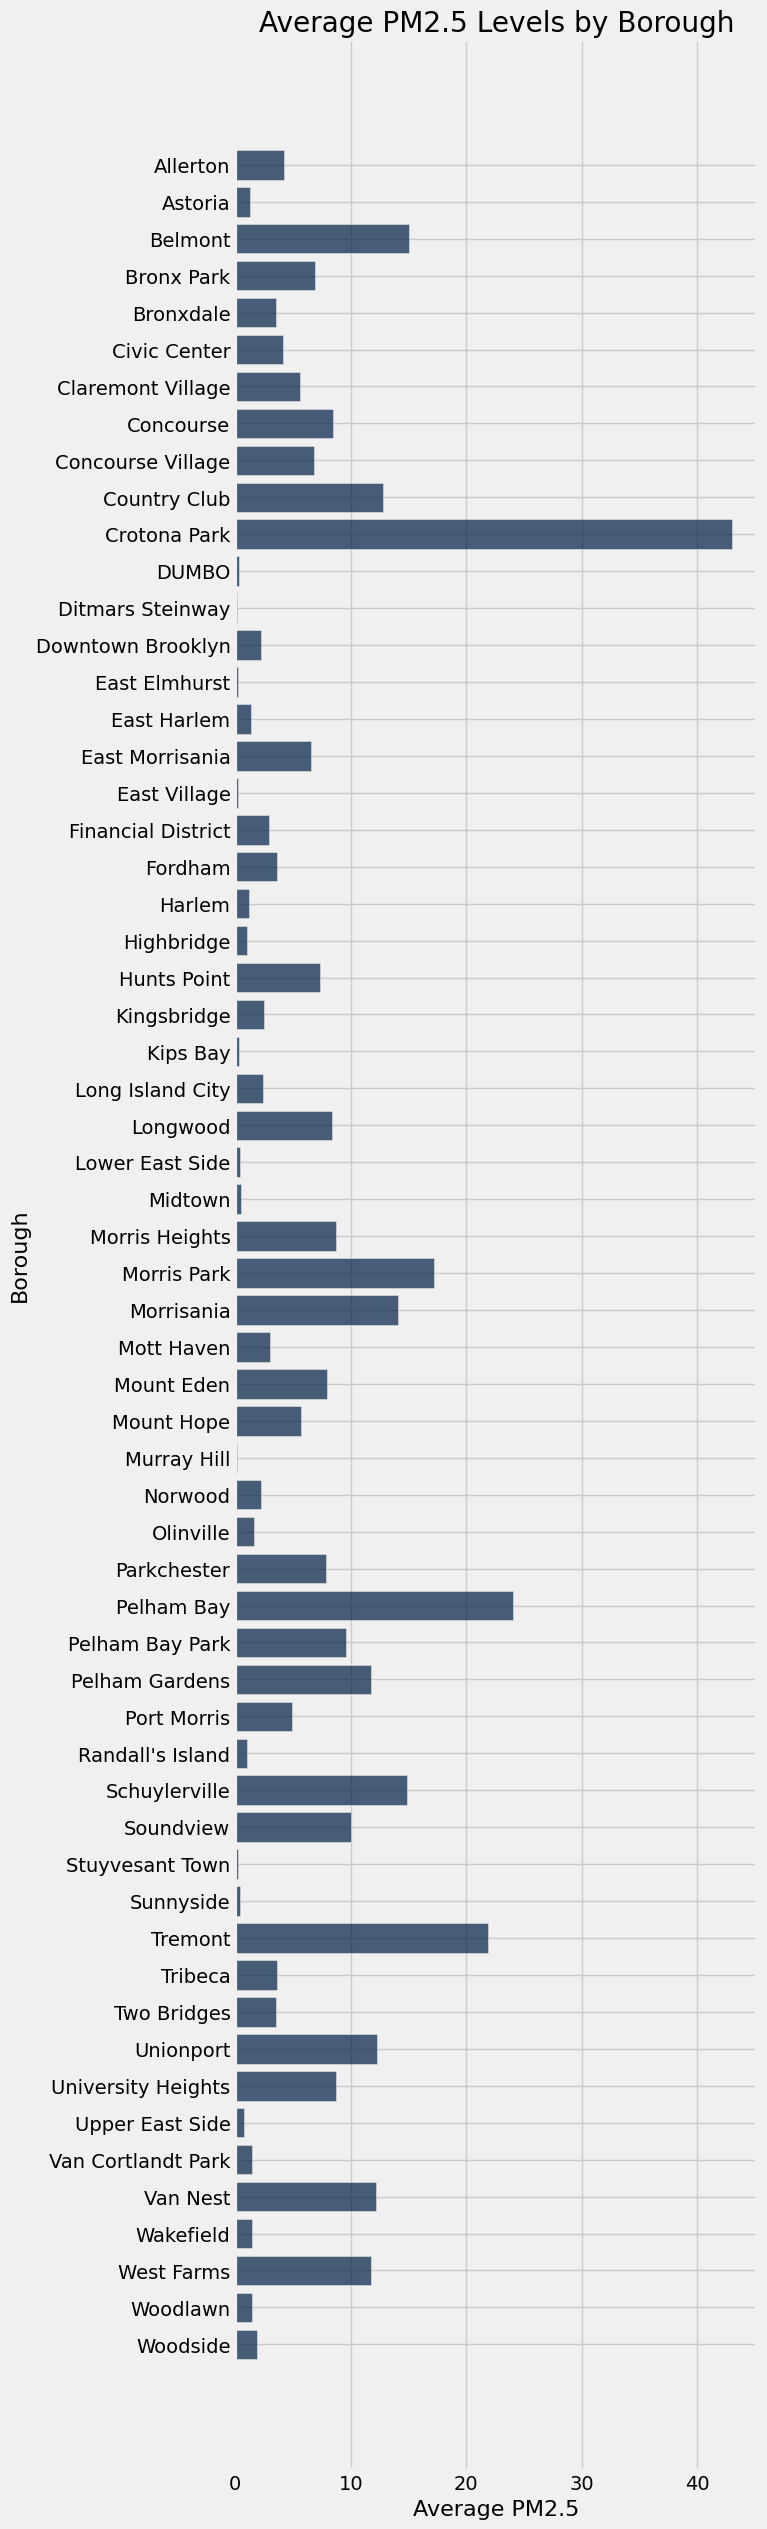

In [38]:
#Bar Chart for average pm25 levels for each borough
borough_avg_pm25.barh("neighborhood", "Average PM2.5")
plt.xlabel("Average PM2.5")
plt.ylabel("Borough")
plt.title("Average PM2.5 Levels by Borough")
plt.show()

Text(0.5, 1.0, 'Temperature vs PM2.5 Levels')

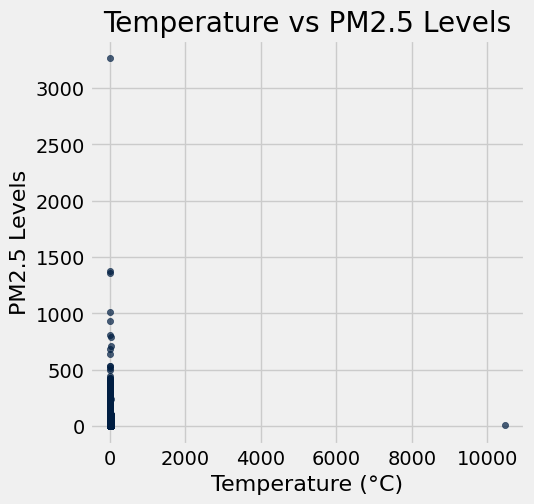

In [39]:
#Scatter plot to visualize relationship between temperature and pm25
pollution_table.scatter("temperature", "pm25")
plt.xlabel("Temperature (°C)")
plt.ylabel("PM2.5 Levels")
plt.title("Temperature vs PM2.5 Levels")
#As we can see below, the table is very skewed because of some extreme outliers

In [40]:
# Define function to remove outliers using IQR
def remove_outliers(table, column):
    q1 = np.percentile(table.column(column), 25)
    q3 = np.percentile(table.column(column), 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return table.where(column, are.between_or_equal_to(lower_bound, upper_bound))

# Remove outliers from temperature and pm25
filtered_table = remove_outliers(pollution_table, "temperature")
filtered_table = remove_outliers(filtered_table, "pm25")


Text(0.5, 1.0, 'Temperature vs PM2.5 Levels (Outliers Removed)')

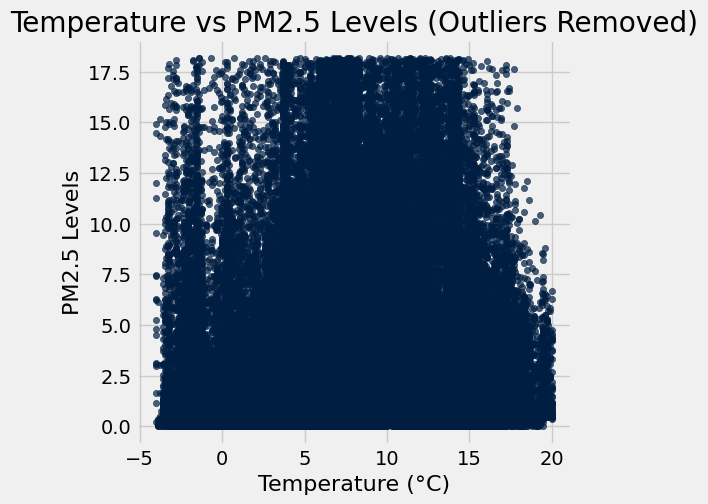

In [41]:
filtered_table.scatter("temperature", "pm25")
plt.xlabel("Temperature (°C)")
plt.ylabel("PM2.5 Levels")
plt.title("Temperature vs PM2.5 Levels (Outliers Removed)")
#Below shows the table after using the IQR method to remove outliers.

Text(0.5, 1.0, 'Temperature vs PM2.5 Levels (Outliers Removed Manually)')

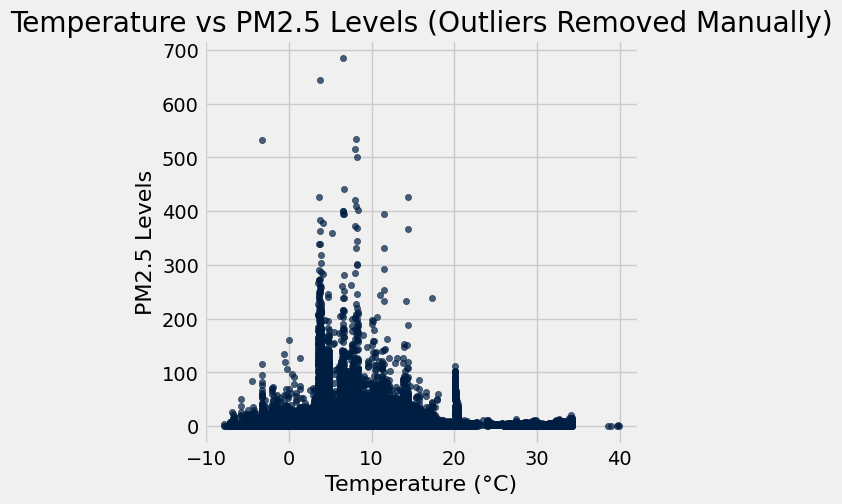

In [42]:
#Alternatively, we can manually specify a threshold and remove and points outside that threshold.
filtered_table_threshold = pollution_table.where("temperature", are.below(50)).where("pm25", are.below(700))
filtered_table_threshold.scatter("temperature", "pm25")
plt.xlabel("Temperature (°C)")
plt.ylabel("PM2.5 Levels")
plt.title("Temperature vs PM2.5 Levels (Outliers Removed Manually)")
#As we can see below, there are still some outliers relative to the data itself. But the plot is still clearer than before.

**We can see that PM2.5 levels spike around lower temperatures and stabilize at higher temperatures. Possible explanations for this could be due to winter emissions. There is increased heating, industrial activity, and vehicle pollution in colder months. The cold air also traps pollutants near the ground, preventing dispersion. At higher temperatures there is better atmospheric dispersion in warmer weather and less heating-related emissions.**

Text(0.5, 1.0, 'Distribution of Humidity Levels Across Neighborhoods')

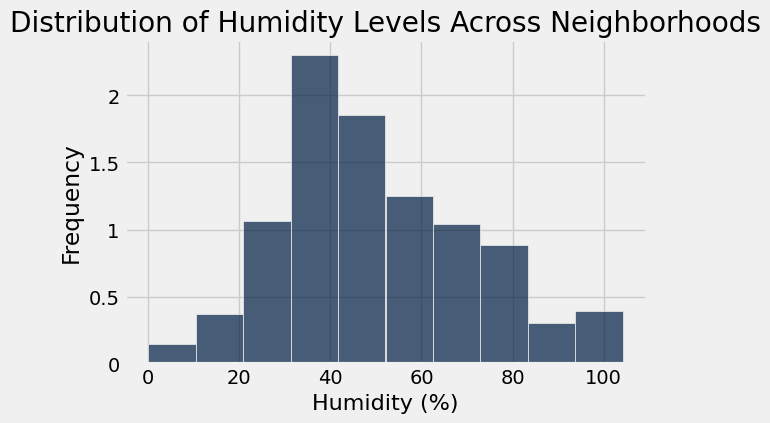

In [43]:
#Histogram of humidity across all neighborhoods
pollution_table.hist("humidity")
plt.xlabel("Humidity (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Humidity Levels Across Neighborhoods")

# Task 4: Define and Use Functions with Tables (1 Mark)

- Write a function calculate_pm25_category(pm25) that categorizes PM2.5 levels as follows:
"Good" if pm25 < 12
"Moderate" if 12 <= pm25 < 35
"Unhealthy" if pm25 >= 35
- Apply this function to the pm25 column in the table using .apply() to create a new column called PM25_Category.
- Count the number of sensors in each PM2.5 category and display the results using .group().


In [45]:
# Function to categorize PM2.5 levels
def calculate_pm25_category(pm25):
    if pm25 < 12:
        return "Good"
    elif 12 <= pm25 < 35:
        return "Moderate"
    else:
        return "Unhealthy"

#Applying the function to the PM25 columns and creating a new column with the new categories
pollution_table = pollution_table.with_column(
    "PM25_Category", pollution_table.apply(calculate_pm25_category, "pm25")
)

pollution_table

pm10,pm25,temperature,humidity,neighborhood,PM25_Category
11.35,5.91,16.3,15.2,Bronx Park,Good
1.18,1.18,16.2,15.1,Bronx Park,Good
0.76,0.76,16.1,15.1,Bronx Park,Good
47.36,4.48,16.1,15.2,Bronx Park,Good
6.18,5.77,16,15.2,Bronx Park,Good
0.73,0.73,15.9,15.3,Bronx Park,Good
1.22,1.22,15.8,15.4,Bronx Park,Good
5.82,4.57,15.8,15.4,Bronx Park,Good
11.04,5.61,15.7,15.5,Bronx Park,Good
1.29,1.29,15.6,15.6,Bronx Park,Good


In [46]:
#Using group to see how many sensors fall into each category.
pm25_category_counts = pollution_table.group("PM25_Category")
pm25_category_counts.show()

PM25_Category,count
Good,101851
Moderate,12651
Unhealthy,3993


# Task 5: Simulate Random Sampling Using Tables (1 Mark)
- Randomly sample 10% of the rows from the table without replacement using .sample().
- Calculate the mean pm25 level for the sampled data.
- Repeat the random sampling process 100 times and store the mean pm25 values from each iteration in a list.
- Create a histogram of the 100 mean pm25 values to visualize the distribution of sample means.

In [48]:
#randomly pick 10% of the rows from pollution_table without replacement:
sampled_table = pollution_table.sample(k=int(0.1 * pollution_table.num_rows), with_replacement=False)
sampled_table

pm10,pm25,temperature,humidity,neighborhood,PM25_Category
6.4,6.08,11.8,58.8,West Farms,Good
5.76,4.71,17.2,42.3,Longwood,Good
2.77,2.72,5.7,71,Van Nest,Good
13.54,13.53,6.9,78.1,Hunts Point,Moderate
0.12,0.12,7.1,43.1,Longwood,Good
0.83,0.83,17.2,36.9,Longwood,Good
0.21,0.21,5,40.2,Bronx Park,Good
13.76,12.42,12.9,65.4,Longwood,Moderate
15.09,10.86,11.2,67.1,Hunts Point,Good
0,0,6.5,44.1,Randall's Island,Good


In [49]:
#Calculating the mean pm25 from the sampled table
sample_mean_pm25 = np.mean(sampled_table.column("pm25"))
print("Mean PM2.5 for the sampled data:", sample_mean_pm25)

Mean PM2.5 for the sampled data: 7.40299265761


In [51]:
#Randomly pick 10% of the rows and find the mean for those 10 percent. Then add those means to an array and print the array. Note the means may vary with each run, due to the sampling being random.
sample_means = []

for _ in range(100):
    sample = pollution_table.sample(k=int(0.1 * pollution_table.num_rows), with_replacement=False)
    sample_mean = np.mean(sample.column("pm25"))
    sample_means.append(sample_mean)

sample_means

[7.5874943033167357,
 7.401004304160689,
 7.2143978394801245,
 7.0974774242552119,
 7.5711190817790532,
 7.1021385770951131,
 7.3403907502742856,
 7.5257329732466882,
 7.6974858637859729,
 7.4629107941598445,
 7.4223740400033762,
 7.4015191155371767,
 7.3632348721411089,
 7.1051717444510079,
 7.4085661237235216,
 7.1331479449742607,
 7.2037522153768254,
 7.5119478436998897,
 7.4245548147522999,
 7.4024854418094357,
 7.4772740315638453,
 7.2888665710186515,
 7.4055354882268549,
 7.6306414043379185,
 7.8155540551945313,
 7.4100303823107447,
 7.3877019157734836,
 7.3477120432103984,
 7.1802017047852136,
 7.4886429234534555,
 7.4912051649928255,
 7.4823225588657278,
 7.3668714659464936,
 7.2874310068360204,
 7.3219453118406612,
 7.3675862942020425,
 7.5187399780572193,
 7.2736138070723273,
 7.0538382985905974,
 7.2499493628154266,
 7.1283391003460208,
 7.2732753818887677,
 7.2252282893071138,
 7.1274765803021349,
 7.3592235631698877,
 7.2485686555827504,
 7.2637260528314629,
 7.49776268039

Text(0.5, 1.0, 'Distribution of Sample Means (100 Iterations)')

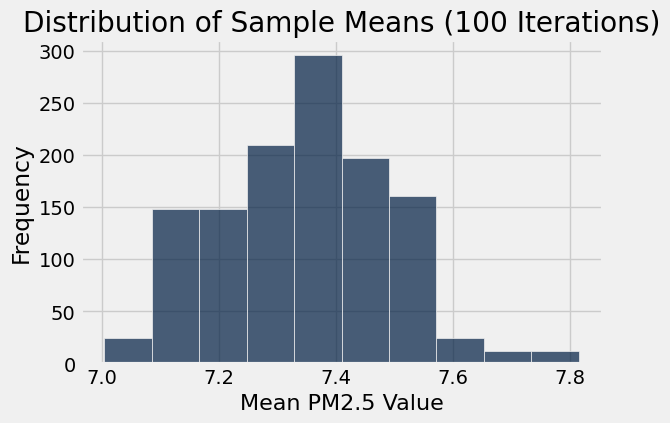

In [52]:
#Histogram of the 100 sampled means.
Table().with_column("Sample Mean PM2.5", sample_means).hist("Sample Mean PM2.5")
plt.xlabel("Mean PM2.5 Value")
plt.ylabel("Frequency")
plt.title("Distribution of Sample Means (100 Iterations)")

# Submission Guidelines
- Add a "Open in Colab" button at the top of your notebook using the following Markdown code:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your-repo-path/notebook.ipynb)

- Upload your completed Jupyter Notebook to a GitHub repository.
- Submit the link to your GitHub repository in the Blackboard LMS along with the Jupyter solution file.
- <font color = red size = 6> ATTENTION!!! </font> Students are encouraged to work on groups, however the submission should be individual and each student should have her/his own unique final assignment solution, which is to be submitted in BB

# Grading Rubric
- Each task is worth 1 mark , based on the following criteria:

- Correctness : The solution produces the expected output using the Table abstraction .
- Clarity : Code is well-organized, readable, and includes comments explaining key steps.
- Creativity : Visualizations and analyses are presented in an engaging and insightful manner.

# Hints for Success
- Use the Table abstraction methods like .select(), .where(), .group(), .apply(), and .sample() for data manipulation.
- Refer to the slides and examples from book Chapters 6, 7, 8, and 9 for guidance on tables, functions, visualizations, and randomness.
- Test your code frequently to ensure it runs without errors.